In [37]:
import pandas as pd # 데이터 프레임
import numpy as np # 계산
import re # 정규표현식

import warnings
warnings.filterwarnings('ignore') # warning 메시지 제거

import seaborn as sns # 시각화
import graphviz # 시각화
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

In [2]:
import matplotlib.pyplot as plt

# 한글 폰트 지정
plt.rc('font', family='AppleGothic') # 맥
# plt.rc('font', family='Malgun Gothic') # 윈도우

# 마이너스 값 깨지는 현상 해결
plt.rc('axes', unicode_minus=False)

# 레티나 디스플레이 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [3]:
df = pd.read_csv('/Users/jungdayoung/Documents/GitHub/Learning_Spoons_Second_Project/data/일별그룹_data.csv')

In [4]:
df.columns

Index(['일시', '도_num', '연도', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25',
       '합계 일조시간(hr)', '가격'],
      dtype='object')

In [5]:
df['일시'] = df['일시'].str.replace('-', '')

In [6]:
df = df[['일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '합계 일조시간(hr)', '가격']]
df

,일시,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),가격
0,20130101,0.008055,0.705943,0.014508,0.027351,53.793694,31.543635,4.233391,28800.000000
1,20130102,0.006252,0.458401,0.024726,0.015768,39.865292,37.602906,8.012553,28800.000000
2,20130103,0.005165,0.443746,0.021831,0.017571,26.996650,35.062375,8.083956,29066.666667
3,20130104,0.006058,0.627333,0.015143,0.029622,39.964823,37.749110,8.738554,29066.666667
4,20130105,0.006336,0.745207,0.014486,0.034354,46.933748,33.378771,7.676589,29066.666667
...,...,...,...,...,...,...,...,...,...
2186,20181227,0.003160,0.363920,0.026685,0.011358,23.527415,8.619631,8.232046,30600.000000
2187,20181228,0.003313,0.423625,0.020198,0.015384,31.120399,13.709885,7.523942,30800.000000
2188,20181229,0.003445,0.426891,0.023384,0.013958,34.862185,13.486144,8.279665,30333.333333
2189,20181230,0.003624,0.487516,0.021316,0.016805,28.162086,17.005345,8.420759,29866.666667


In [7]:
train_dataset = df[~df['일시'].str.contains('2018')]
test_dataset = df[df['일시'].str.contains('2018')]

In [8]:
train_dataset

,일시,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),가격
0,20130101,0.008055,0.705943,0.014508,0.027351,53.793694,31.543635,4.233391,28800.000000
1,20130102,0.006252,0.458401,0.024726,0.015768,39.865292,37.602906,8.012553,28800.000000
2,20130103,0.005165,0.443746,0.021831,0.017571,26.996650,35.062375,8.083956,29066.666667
3,20130104,0.006058,0.627333,0.015143,0.029622,39.964823,37.749110,8.738554,29066.666667
4,20130105,0.006336,0.745207,0.014486,0.034354,46.933748,33.378771,7.676589,29066.666667
...,...,...,...,...,...,...,...,...,...
1821,20171227,0.003757,0.444184,0.021018,0.017963,23.102752,12.274415,8.518001,22066.666667
1822,20171228,0.004966,0.656190,0.013472,0.029597,48.832838,28.938910,3.856231,22066.666667
1823,20171229,0.005227,0.801625,0.014872,0.034964,84.195141,51.171279,3.708724,22066.666667
1824,20171230,0.004669,0.874691,0.015140,0.034188,107.461279,69.185941,1.940541,22016.666667


In [9]:
test_dataset

,일시,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),가격
1826,20180101,0.004301,0.591944,0.019592,0.019712,43.980462,23.513624,8.429613,21916.666667
1827,20180102,0.004779,0.745936,0.015910,0.026357,59.676745,34.993654,5.816527,21866.666667
1828,20180103,0.004296,0.494770,0.020404,0.018595,31.847367,21.315823,8.262354,21333.333333
1829,20180104,0.004569,0.535319,0.015802,0.024478,39.142666,26.342236,5.016736,21066.666667
1830,20180105,0.004586,0.598946,0.015876,0.027507,46.642666,31.609033,6.593023,21066.666667
...,...,...,...,...,...,...,...,...,...
2186,20181227,0.003160,0.363920,0.026685,0.011358,23.527415,8.619631,8.232046,30600.000000
2187,20181228,0.003313,0.423625,0.020198,0.015384,31.120399,13.709885,7.523942,30800.000000
2188,20181229,0.003445,0.426891,0.023384,0.013958,34.862185,13.486144,8.279665,30333.333333
2189,20181230,0.003624,0.487516,0.021316,0.016805,28.162086,17.005345,8.420759,29866.666667


In [10]:
# sns.pairplot(train_dataset[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '합계 일조시간(hr)', '가격']], diag_kind="kde")

In [11]:
train_stats = train_dataset.describe()
train_stats.pop("가격")

count     1826.000000
mean     26368.008397
std       7519.861446
min      12866.666667
25%      19466.666667
50%      27555.555556
75%      32333.333333
max      42666.666667
Name: 가격, dtype: float64

In [12]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
SO2,1826.0,0.004567,0.001245,0.002447,0.003687,0.004303,0.005110,0.011325
CO,1826.0,0.492271,0.144205,0.248684,0.390934,0.453541,0.565250,1.328210
O3,1826.0,0.027812,0.010607,0.006075,0.019519,0.026829,0.035027,0.072478
NO2,1826.0,0.020800,0.006971,0.007169,0.015669,0.019076,0.025543,0.047221
PM10,1826.0,45.702578,21.477901,10.698345,31.439913,42.234049,54.527344,333.112887
PM25,1826.0,24.909677,8.447454,7.805669,18.779871,23.933758,29.893482,69.185941
합계 일조시간(hr),1826.0,6.470134,3.303467,0.002422,4.032981,7.102630,9.015018,13.009882


In [13]:
train_labels = train_dataset.pop('가격')
test_labels = test_dataset.pop('가격')

In [14]:
train_dataset1 = train_dataset.set_index('일시')
test_dataset1 = test_dataset.set_index('일시')

In [20]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset1)
normed_test_data = norm(test_dataset1)

In [21]:
train_dataset.keys()

Index(['일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '합계 일조시간(hr)'], dtype='object')

In [22]:
len(train_dataset.keys())

8

In [23]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = build_model()

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [51]:
example_batch = normed_train_data
example_result = model.predict(example_batch)
example_result

array([[29582.803],
       [27964.658],
       [28317.842],
       ...,
       [33410.758],
       [37770.35 ],
       [28235.154]], dtype=float32)

In [45]:
#d = normalize(np.array(train_labels).reshape([-1,1]))

In [52]:
# mean_squared_error(example_result,train_labels)

49096800.8676014

In [53]:
normed_test_data

,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
일시,,,,,,,
20180101,-0.213157,0.691187,-0.774983,-0.156064,-0.080181,-0.165263,0.593158
20180102,0.170781,1.759052,-1.122142,0.797127,0.650630,1.193730,-0.197855
20180103,-0.217278,0.017330,-0.698456,-0.316368,-0.645091,-0.425436,0.542527
20180104,0.001623,0.298517,-1.132325,0.527586,-0.305426,0.169585,-0.439961
20180105,0.015702,0.739740,-1.125366,0.962115,0.043770,0.793062,0.037200
...,...,...,...,...,...,...,...
20181227,-1.129111,-0.890060,-0.106261,-1.354464,-1.032464,-1.928397,0.533352
20181228,-1.006434,-0.476030,-0.717917,-0.776918,-0.678939,-1.325819,0.319001
20181229,-0.900824,-0.453382,-0.417515,-0.981514,-0.504723,-1.352305,0.547767


In [54]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [55]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,4.466163e+07,5705.362793,44661628.0,5.496185e+07,6310.351074,54961852.0,995
996,4.464557e+07,5703.134277,44645572.0,5.457348e+07,6305.955566,54573480.0,996
997,4.463927e+07,5704.096680,44639268.0,5.466498e+07,6313.498535,54664976.0,997
998,4.464200e+07,5706.187500,44642000.0,5.479012e+07,6311.672363,54790128.0,998
999,4.459431e+07,5705.771973,44594312.0,5.531443e+07,6323.657715,55314432.0,999


Font 'rm' does not have a glyph for '\uac00' [U+ac00], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\uaca9' [U+aca9], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\uac00' [U+ac00], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\uaca9' [U+aca9], substituting with a dummy symbol.


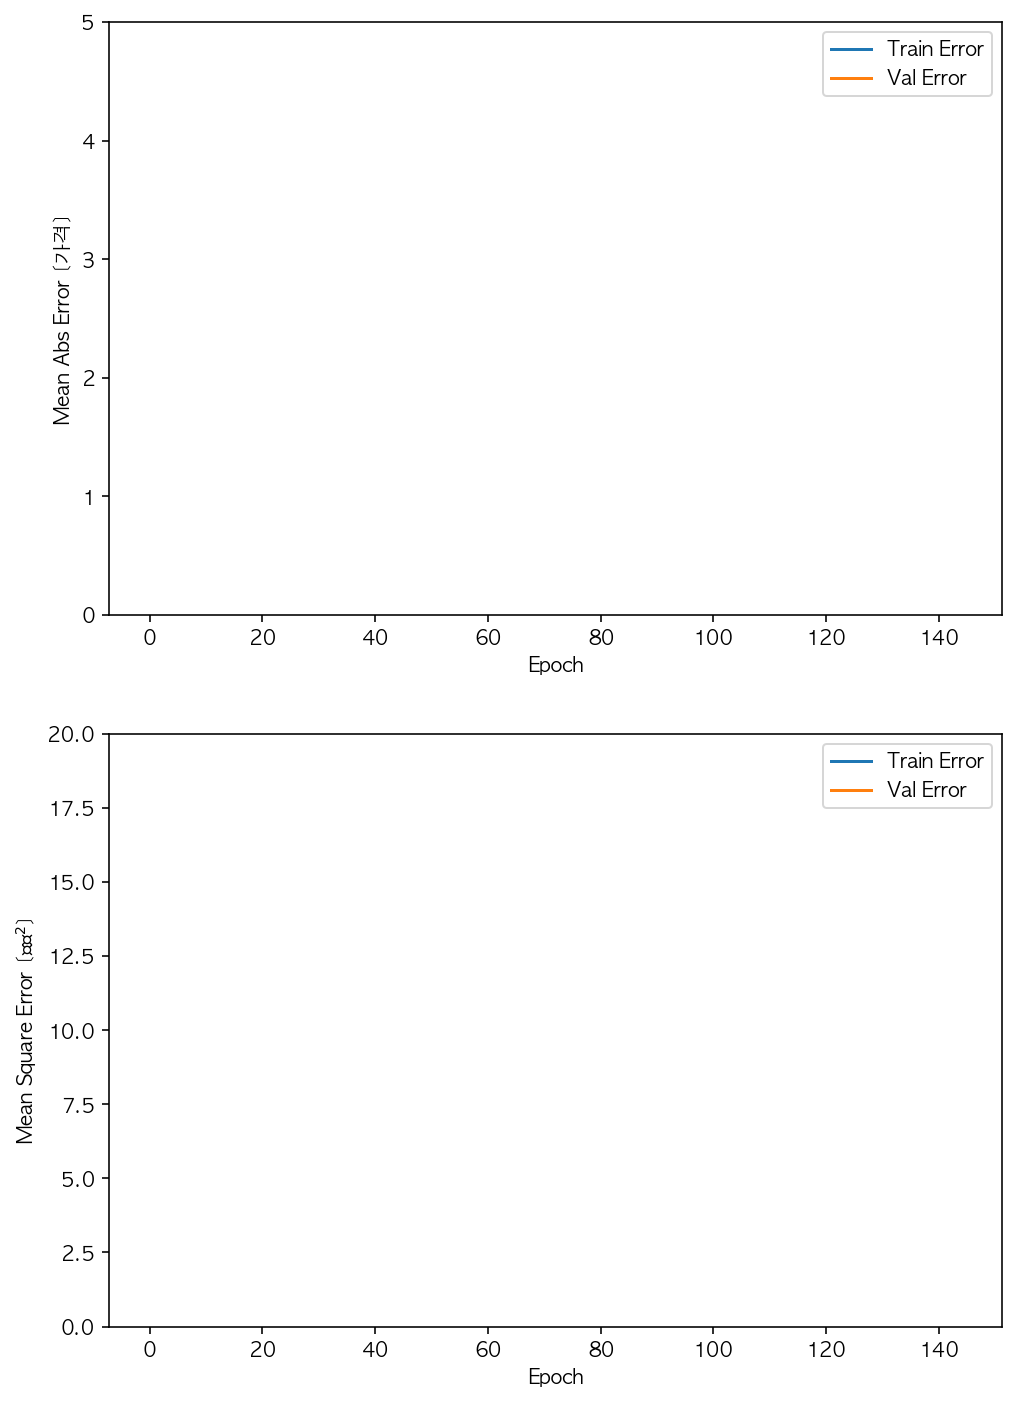

In [63]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [가격]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$가격^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)


....................................................................................................
.............................................

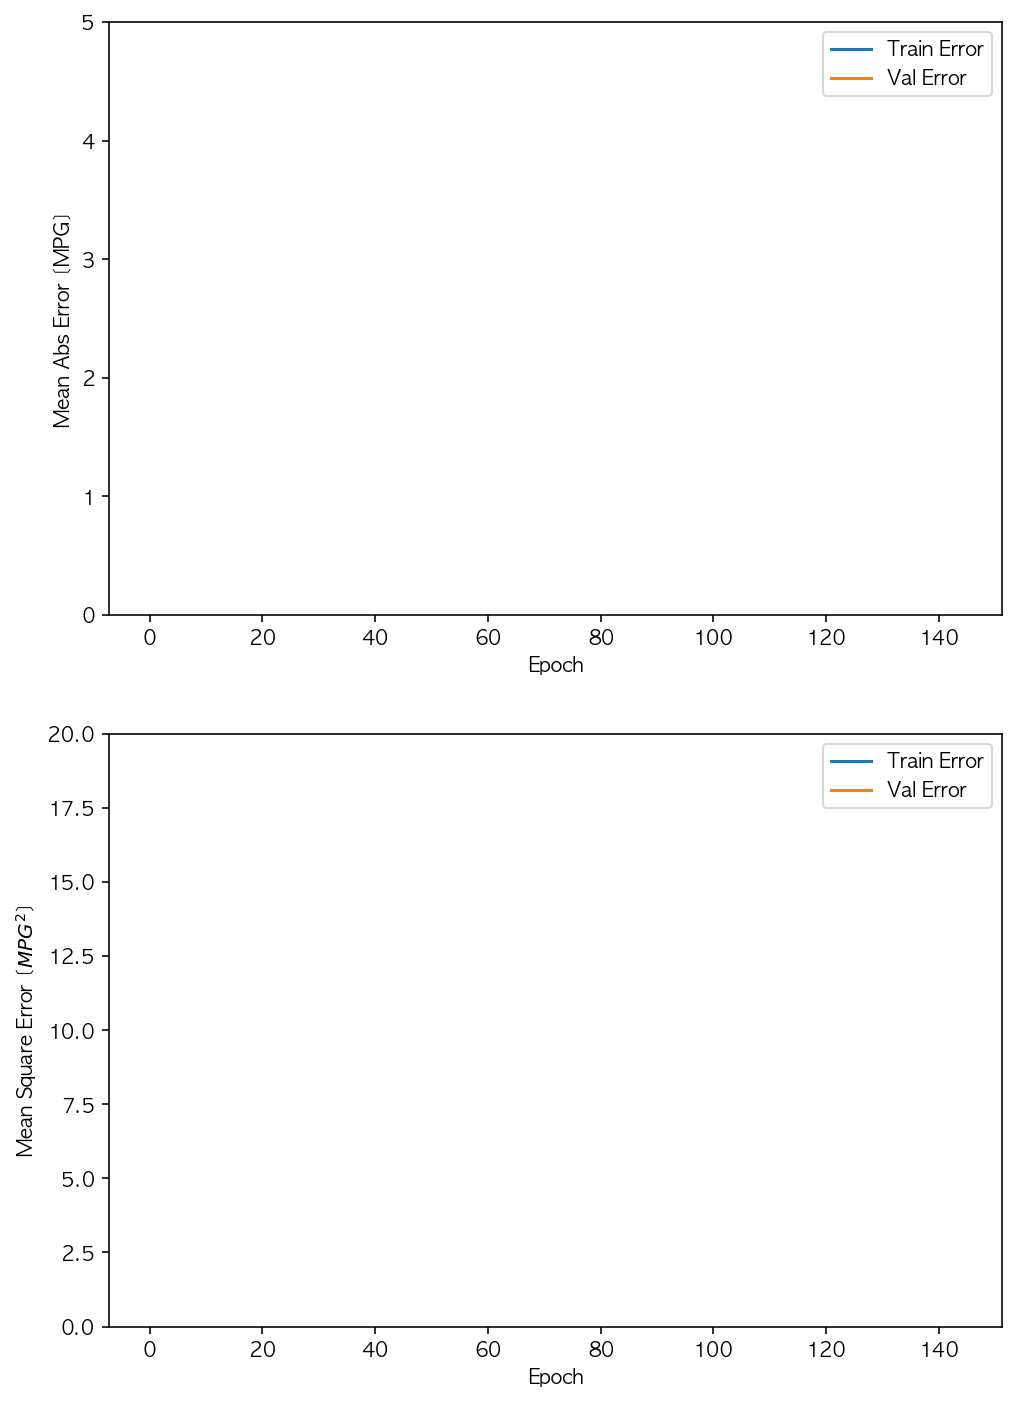

In [57]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [58]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} 가격".format(mae))

365/365 - 0s - loss: 83591008.2685 - mae: 6370.9644 - mse: 83591008.0000
테스트 세트의 평균 절대 오차: 6370.96 가격


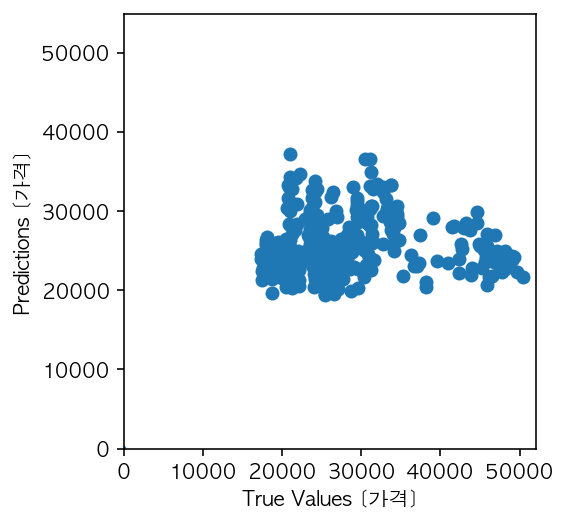

In [62]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [가격]')
plt.ylabel('Predictions [가격]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

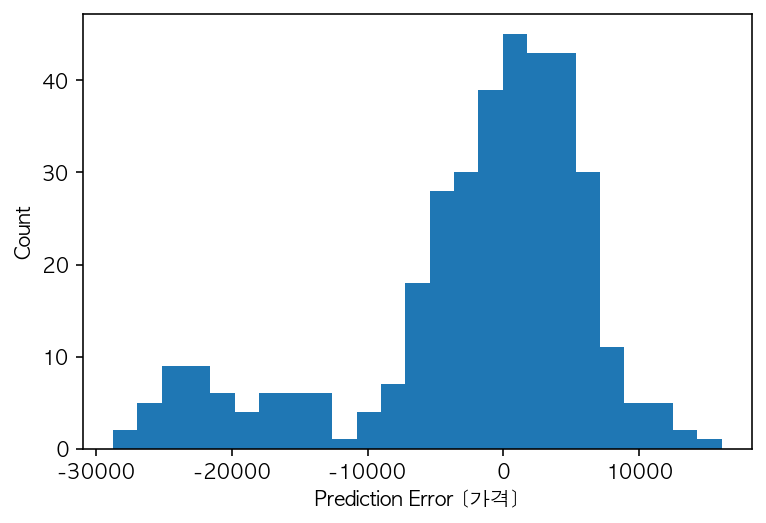

In [61]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [가격]")
_ = plt.ylabel("Count")